# <a>PROJECT: PREDICT IF THE PERSON LIKELY TO HAVE HEART DISEASE OR NOT</a>

Submitted by - Manisha Rathore

Submitted to - Mr. Ritul

### Acknowledgement

It is great pleasure for me to undertake this project. I feel highly doing the project entitled :- “Predict if te person likely to have heart di” I am thankful to my project guide Mr Rohan Saini faculty member of IMS ProSchool. This project would not have completed without his enormus help and worthy experience. Whenever I was in need he was there behind me. Although this report has been prepared with utmost care and deep route interest. Even then I accept respondent and imperfection.

### Problem Type: Classification
### Domain: Health Care
### Problem Statement

A healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identification of disease and have medical intervention if necessary. This would help not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked. Given the data, we need to develop appropriate models to identify/predict if the person likely to have heart disease or not.

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Dataset.csv')

In [3]:
df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,...,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,...,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,...,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,...,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,...,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [4]:
df.nunique()

ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         102
A16         102
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64

Observations: ID and A21 have max unique values.
A11 have only one value.
A13, A17, A18, A19, A20, A22 and Target have binary values.

In [5]:
# Drop ID , A11, A21 having max unique values.


df.drop(['ID', 'A21', "A11"], axis=1, inplace =True)

In [6]:
total_missing = df.isnull().sum().sort_values(ascending=False)
print(total_missing)

A2        1743
Target       0
A22          0
A1           0
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
IV           0
dtype: int64


In [7]:
df.describe()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A13,A14,A15,A16,A17,A18,A19,A20,A22,Target
count,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,132.947551,...,0.001838,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,0.000204,0.329424
std,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,4151.795360,...,0.042830,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.014288,0.470011
min,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,...,0.000000,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,19.000000,...,0.000000,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,742110.000000,...,1.000000,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling Null and unrequired values

In [8]:
from sklearn import impute
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = impute.SimpleImputer(missing_values=-99, strategy='median')


In [9]:
df['A2'] = imputer.fit_transform(np.array(df['A2']).reshape(-1,1))
df['A15'] = imputer1.fit_transform(np.array(df['A15']).reshape(-1,1))
df['IV'] = imputer.fit_transform(np.array(df['A2']).reshape(-1,1))
df['A16'] = imputer1.fit_transform(np.array(df['A15']).reshape(-1,1))

In [10]:
df.describe()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A13,A14,A15,A16,A17,A18,A19,A20,A22,Target
count,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,7.387970,36.126367,7.387970,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,132.947551,...,0.001838,1.744757,0.759845,0.759845,0.208658,0.000321,0.131939,0.962370,0.000204,0.329424
std,6.008192,427.707021,6.008192,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,4151.795360,...,0.042830,26.077507,0.253245,0.253245,0.406355,0.017910,0.338429,0.190303,0.014288,0.470011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.680000,0.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,...,0.000000,0.000000,0.830000,0.830000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,19.000000,...,0.000000,0.000000,0.960000,0.960000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,52.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,742110.000000,...,1.000000,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here some of the columns have outliers as e max value is much higher than the third quartile. 

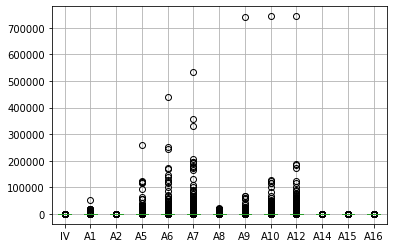

In [11]:
boxplot = df.boxplot(column=['IV', 'A1','A2',  'A5', 'A6', 'A7','A8', 'A9','A10','A12','A14','A15','A16'      ])   



Outliers present for A1, A5, A6, A7, A9, A10, A12

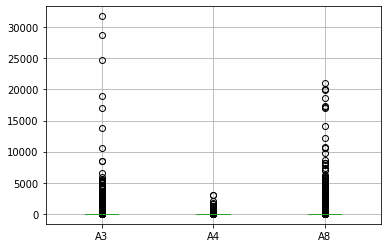

In [13]:
boxplot = df.boxplot(column=['A3', "A4",'A8']) 

Outliers present for A3, A4, A8

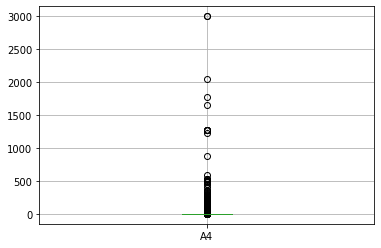

In [14]:
boxplot = df.boxplot(column=["A4"]) 

In [15]:
columns= ['IV', 'A1','A3', "A4","A8",'A5', 'A6', 'A7', 'A9','A10','A12', 'A14'  ]

### Handling outliers

In [16]:
# Replacing outliers with upper and lower whisker values

for i in columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +( whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

In [18]:
df.describe()

,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A13,A14,A15,A16,A17,A18,A19,A20,A22,Target
count,34281.000000,34281.000000,34281.000000,34281.0,34281.0,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,...,34281.000000,34281.0,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,6.938260,2.644964,7.387970,0.0,0.0,11.503748,21.317785,30.878242,3.965754,12.631983,...,0.001838,0.0,0.759845,0.759845,0.208658,0.000321,0.131939,0.962370,0.000204,0.329424
std,3.534144,3.916790,6.008192,0.0,0.0,17.128432,31.264614,45.356513,5.588468,17.499319,...,0.042830,0.0,0.253245,0.253245,0.406355,0.017910,0.338429,0.190303,0.014288,0.470011
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.680000,0.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,8.000000,0.0,0.0,0.000000,2.000000,4.000000,1.000000,3.000000,...,0.000000,0.0,0.830000,0.830000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.000000,4.000000,8.000000,0.0,0.0,18.000000,33.000000,48.000000,6.000000,19.000000,...,0.000000,0.0,0.960000,0.960000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,15.500000,10.000000,52.000000,0.0,0.0,45.000000,82.500000,120.000000,15.000000,47.500000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations: All values of A3, A4, A14 are 0, so drop them.

In [19]:
df.drop(['A3', 'A4', "A14"], axis=1, inplace =True)

In [20]:
df.describe()

,IV,A1,A2,A5,A6,A7,A8,A9,A10,A12,A13,A15,A16,A17,A18,A19,A20,A22,Target
count,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,6.938260,2.644964,7.387970,11.503748,21.317785,30.878242,3.965754,12.631983,24.493991,35.829497,0.001838,0.759845,0.759845,0.208658,0.000321,0.131939,0.962370,0.000204,0.329424
std,3.534144,3.916790,6.008192,17.128432,31.264614,45.356513,5.588468,17.499319,33.990899,49.645826,0.042830,0.253245,0.253245,0.406355,0.017910,0.338429,0.190303,0.014288,0.470011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680000,0.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.000000,0.000000,8.000000,0.000000,2.000000,4.000000,1.000000,3.000000,6.000000,8.000000,0.000000,0.830000,0.830000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,8.000000,4.000000,8.000000,18.000000,33.000000,48.000000,6.000000,19.000000,37.000000,54.000000,0.000000,0.960000,0.960000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,15.500000,10.000000,52.000000,45.000000,82.500000,120.000000,15.000000,47.500000,92.500000,135.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


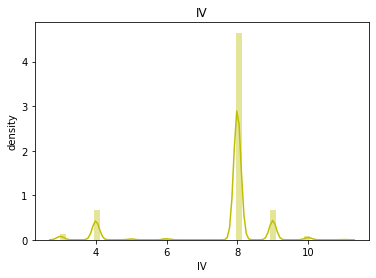

IV  is NOT skewed


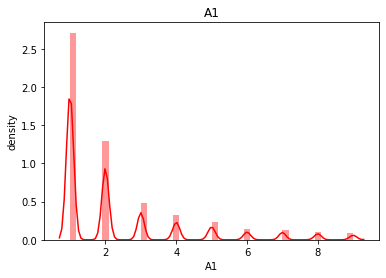

A1  is Right skewed and needs logarithmic scaling


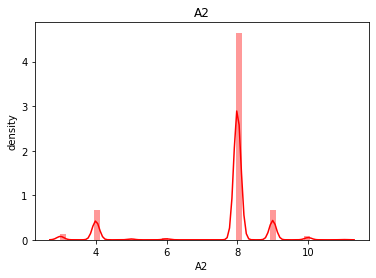

A2  is Right skewed and needs logarithmic scaling


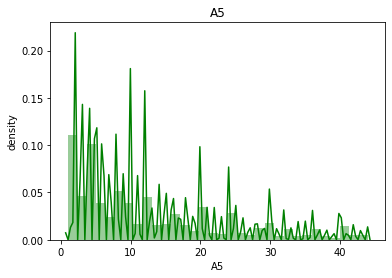

A5  is Right skewed and needs logarithmic scaling


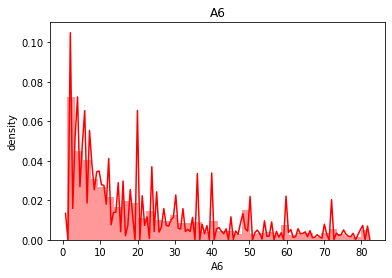

A6  is Right skewed and needs logarithmic scaling


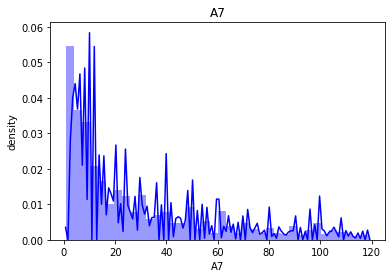

A7  is Right skewed and needs logarithmic scaling


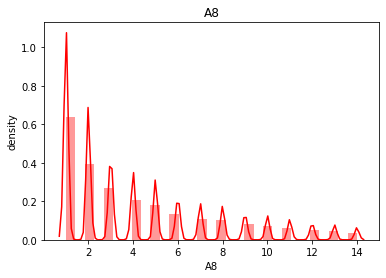

A8  is Right skewed and needs logarithmic scaling


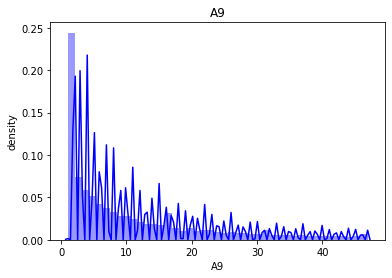

A9  is Right skewed and needs logarithmic scaling


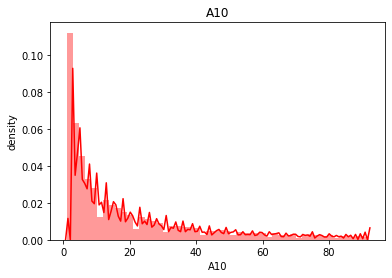

A10  is Right skewed and needs logarithmic scaling


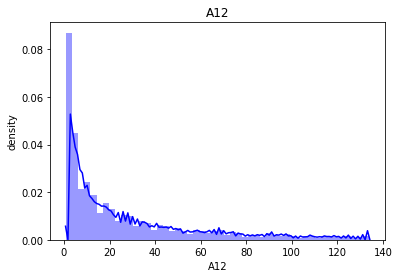

A12  is Right skewed and needs logarithmic scaling


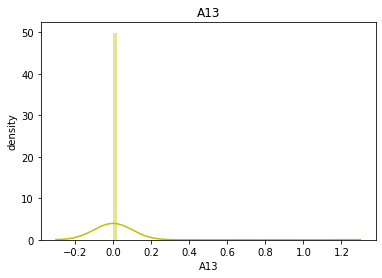

A13  is Right skewed and needs logarithmic scaling


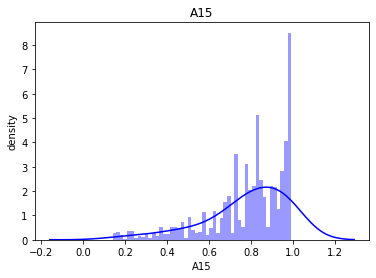

A15  is left skewed and needs square treatment


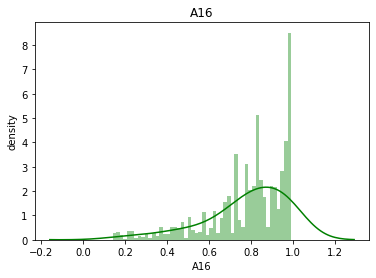

A16  is left skewed and needs square treatment


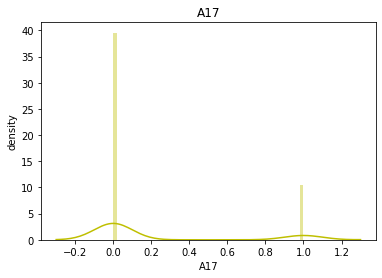

A17  is Right skewed and needs logarithmic scaling


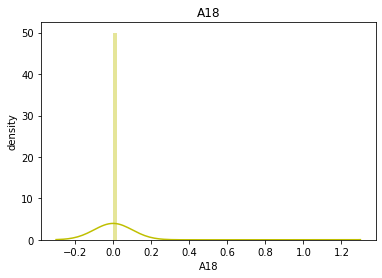

A18  is Right skewed and needs logarithmic scaling


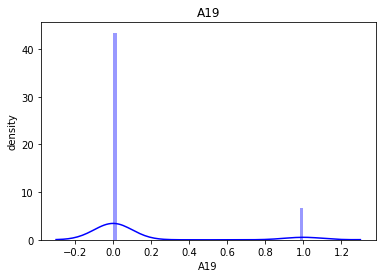

A19  is Right skewed and needs logarithmic scaling


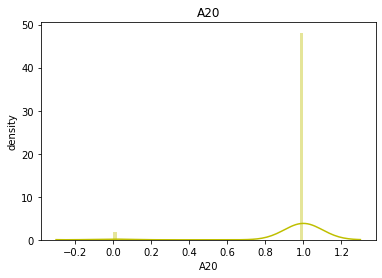

A20  is left skewed and needs square treatment


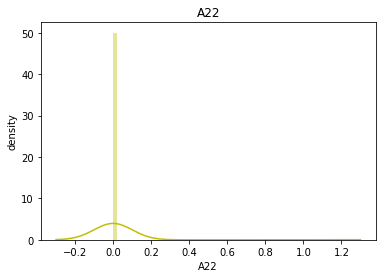

A22  is Right skewed and needs logarithmic scaling


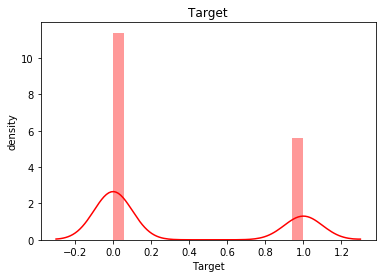

Target  is NOT skewed


In [21]:
import random 
df_length = len(df)
rej_many_sub_cats_col = []
right_skewed_col = []
left_skewed_col = []

for col in df.columns:
    df_percentile = df.loc[(df[col] < np.percentile(df[col],95)) & (df[col] > np.percentile(df[col],5)), [col]]          
    if (len(df_percentile) == 0):
        dplot = sns.distplot(df[col], kde_kws={'bw':0.1}, color=random.choice(['r','y','b','g']))
    else:
        dplot = sns.distplot(df_percentile[col],kde_kws={'bw':0.1},  color=random.choice(['r','y','b','g']))

    dplot.set_title(col)
    dplot.set_xlabel(col)
    dplot.set_ylabel("density")
#plt.savefig("plots/univariate/dplot_" + str(i) + ".png")
    plt.show()
    
#check skewness
    skewchk = df[col].skew(axis=0)
    if skewchk > 1:
        right_skewed_col.append(col)
        print (col ,' is Right skewed and needs logarithmic scaling')
    elif skewchk < -1:
        left_skewed_col.append(col)
        print (col ,' is left skewed and needs square treatment')
    else:
        print (col , ' is NOT skewed')



### Observations:

Below columns are highly Right skewed:

'IV', 'A1',  'A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A12'

Below columns are highly Left skewed:

'A15', 'A16', "A2"

 Categorical Type: A13, A17, A18, A19, A20, A22

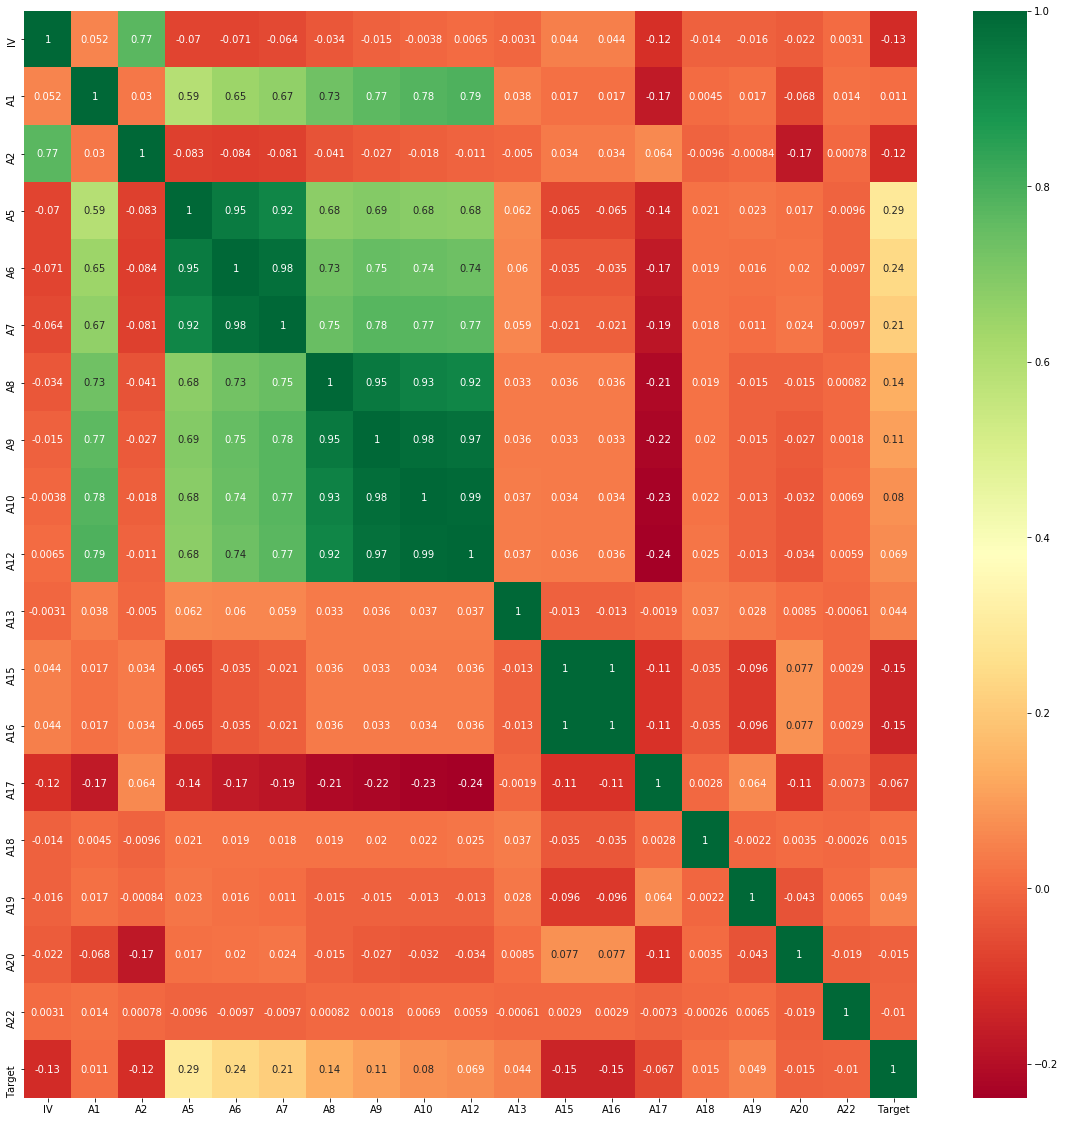

In [23]:

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Multi-colinearity among features:

Column A5,A6,A7 are correlated with each other. Thus, A5,A6 can be dropped.

Column A15, A16 are also correlated with each other. Thus, A15 can be dropped.

Columns A9, A10, A12 are also strongly correlated with each other. Thus, A9, A10 can be dropped.

In [24]:
df.drop(['A5', 'A6', "A15","A9","A10"], axis=1, inplace =True)

In [25]:
df.head()

,IV,A1,A2,A7,A8,A12,A13,A16,A17,A18,A19,A20,A22,Target
0,8.0,10.0,8.0,0.0,15.0,135.0,0,0.52,0,0,0,1,0,0
1,8.0,0.0,8.0,0.0,1.0,1.0,0,0.59,1,0,0,1,0,0
2,9.0,2.0,9.0,0.0,0.0,2.0,0,0.94,1,0,0,0,0,0
3,2.0,4.0,2.0,30.0,7.0,71.0,0,0.51,0,0,0,1,0,0
4,8.0,0.0,8.0,1.0,0.0,2.0,0,0.82,0,0,0,1,0,0


In [26]:
import sklearn.feature_selection

In [27]:
from sklearn.feature_selection import chi2

In [28]:
X = df.drop('Target',axis=1)
y = df['Target']


In [29]:
X

,IV,A1,A2,A7,A8,A12,A13,A16,A17,A18,A19,A20,A22
0,8.0,10.0,8.0,0.0,15.0,135.0,0,0.52,0,0,0,1,0
1,8.0,0.0,8.0,0.0,1.0,1.0,0,0.59,1,0,0,1,0
2,9.0,2.0,9.0,0.0,0.0,2.0,0,0.94,1,0,0,0,0
3,2.0,4.0,2.0,30.0,7.0,71.0,0,0.51,0,0,0,1,0
4,8.0,0.0,8.0,1.0,0.0,2.0,0,0.82,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34276,10.0,0.0,10.0,24.0,0.0,13.0,0,0.89,0,0,0,1,0
34277,4.0,2.0,4.0,0.0,5.0,18.0,0,0.22,1,0,0,1,0
34278,8.0,4.0,8.0,10.0,2.0,25.0,0,0.99,0,0,0,1,0
34279,2.0,0.0,2.0,120.0,0.0,2.0,0,0.85,0,0,0,1,0


In [30]:
chi_scores = chi2(X,y)

In [31]:
print(chi_scores )

(array([1.00073919e+03, 2.29110959e+01, 2.35902643e+03, 1.04741596e+05,
       4.95341911e+03, 1.11404722e+04, 6.57353875e+01, 6.16003166e+01,
       1.22729777e+02, 7.88177566e+00, 7.24297354e+01, 2.90882566e-01,
       3.43879415e+00]), array([1.24049077e-219, 1.69669593e-006, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 5.15715180e-016, 4.20750986e-015,
       1.59795037e-028, 4.99354269e-003, 1.73086192e-017, 5.89655516e-001,
       6.36821555e-002]))


In [32]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

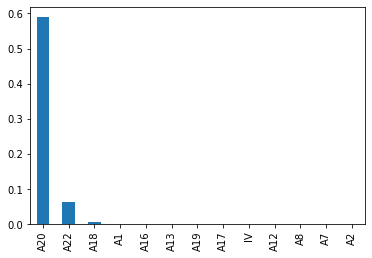

In [33]:
p_values.plot.bar()

Since A20 has higher the p-value, it says that this variables is independent of the repsone and can not be considered for model training

In [34]:
df=df.drop("A20", axis=1)

## Data Preprocessing

In [35]:
feature_skew = df.select_dtypes(include=[np.number]).skew()
feature_skew

IV        -0.033551
A1         1.192153
A2         4.836702
A7         1.208937
A8         1.172273
A12        1.210658
A13       23.263535
A16       -1.498035
A17        1.434012
A18       55.800783
A19        2.175240
A22       69.962235
Target     0.725879
dtype: float64

### Observations:

From above, it can be seen that there are columns which are right skewed and would need log transformation before scaling.


In [36]:
log_features = ['IV','A1', 'A2','A7', 'A8', 'A12']
boolean_features = ['A13', 'A17', 'A18', 'A19', 'A22']

In [37]:
# Applying Log transformation to Log_features:

for col in log_features:
    df[col] = df[col].apply(lambda i:np.log10(i) if i > 0 else 0)

In [38]:
# Seperating Target column from X axis features and creating 'y' variable with 'Target' column alone.

X = df.drop('Target',axis=1)
y = df['Target']

## Train-test split

In [39]:
from sklearn.model_selection import train_test_split, validation_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, classification, classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [42]:
X.columns

Index(['IV', 'A1', 'A2', 'A7', 'A8', 'A12', 'A13', 'A16', 'A17', 'A18', 'A19',
       'A22'],
      dtype='object')

In [43]:
model = DecisionTreeClassifier(criterion='entropy',random_state=45, max_depth=4)
model.fit(X=X_train, y=y_train)
y_predict = model.predict(X=X_test)

Accuracy of classifier is : 0.7711229946524064
              precision    recall  f1-score   support

     class_0       0.90      0.75      0.81      6908
     class_1       0.61      0.82      0.70      3377

    accuracy                           0.77     10285
   macro avg       0.75      0.78      0.76     10285
weighted avg       0.80      0.77      0.78     10285



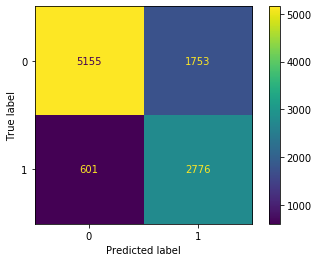

In [44]:
# validate accuracy
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=y_predict))
print (classification_report(y_true=y_test, y_pred=y_predict, target_names=['class_0','class_1']))
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, values_format='.0f')

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [46]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

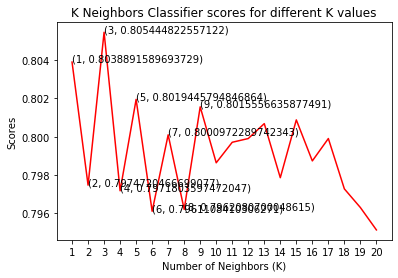

In [47]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [48]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

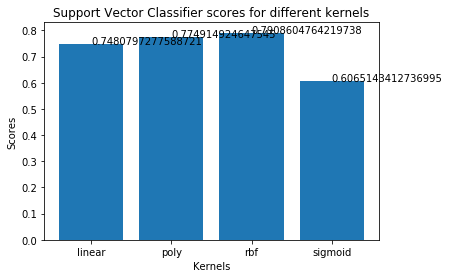

In [49]:

plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [50]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [52]:
rfc=RandomForestClassifier(n_estimators=500)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred_gb=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))

0.8352941176470589
[[5971  937]
 [ 757 2620]]


Here, the best accuracy score is obtained by Random Forest model which is 0.836 .